In [1]:
#Importing Libraries
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
import time
import operator
from keras.models import Model, load_model

#Importing necessary files in directory
import import_ipynb
from preprocess import *
from digits_recog import *
model = load_model('mnist_cnn_99.h5')

importing Jupyter notebook from preprocess.ipynb
importing Jupyter notebook from digits_recog.ipynb
Original Image


<Figure size 640x480 with 1 Axes>

Grayscale


<Figure size 640x480 with 1 Axes>

Morph Open


<Figure size 640x480 with 1 Axes>

Dilate


<Figure size 640x480 with 1 Axes>

Blurred


<Figure size 640x480 with 1 Axes>

inverted


<Figure size 640x480 with 1 Axes>

resized


<Figure size 640x480 with 1 Axes>

Predicted Number is [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [20]:
def get_grid_lines(img, length=12):
    horizontal = np.copy(img)
    cols = horizontal.shape[1]
    horizontal_size = cols // length
    horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    horizontal = cv2.erode(horizontal, horizontal_structure)
    horizontal = cv2.dilate(horizontal, horizontal_structure)

    vertical = np.copy(img)
    rows = vertical.shape[0]
    vertical_size = rows // length
    vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
    vertical = cv2.erode(vertical, vertical_structure)
    vertical = cv2.dilate(vertical, vertical_structure)

    return vertical, horizontal

In [21]:
def create_grid_mask(vertical, horizontal):
    grid = cv2.add(horizontal, vertical)
    
    plt.imshow(grid,cmap='gray')
    plt.show()
    
    mask = cv2.bitwise_not(grid)
    return mask

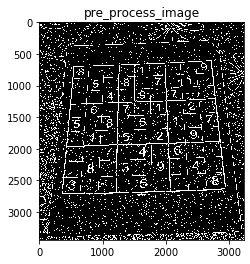

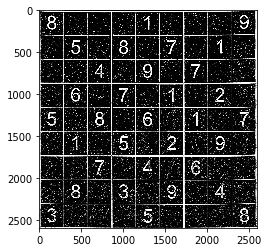

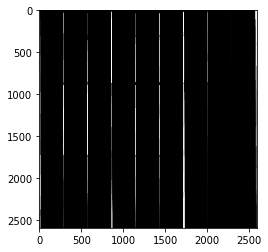

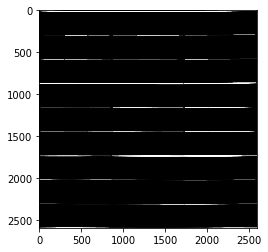

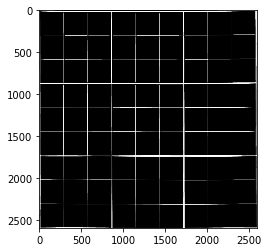

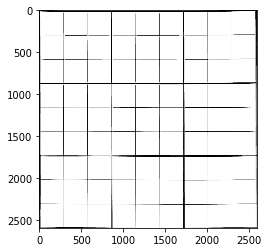

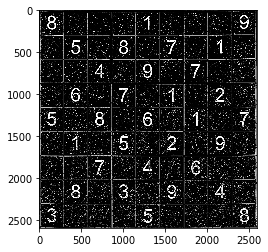

'\nsudoku = cv2.cvtColor(sudoku, cv2.COLOR_GRAY2BGR)\n\nn = sudoku.shape[1]//9\n\n#crop_img = sudoku[(3*n):(3*n)+n,(1*n):(1*n)+n]\n\n#cv2.imwrite("6.jpg",crop_img)\n\n#ppi = pre_process_image(sudoku)\n\n#sudoku = ~sudoku\n\n#ppi = pre_process_image(sudoku)\n\nplt.imshow(crop_img,cmap=\'gray\')\nplt.show()\n\n#get_number(crop_img)\n'

In [22]:
img=cv2.imread('paper.jpg')
        
warp=get_sudoku(img)
sudoku=cv2.GaussianBlur(warp, (9, 9), 1)

plt.imshow(sudoku,cmap='gray')
plt.show()

vertical_lines, horizontal_lines = get_grid_lines(sudoku)

plt.imshow(vertical_lines,cmap='gray')
plt.show()

plt.imshow(horizontal_lines,cmap='gray')
plt.show()

mask = create_grid_mask(vertical_lines, horizontal_lines)

plt.imshow(mask,cmap='gray')
plt.show()

numbers = cv2.bitwise_and(sudoku, mask)

plt.imshow(numbers,cmap='gray')
plt.show()

"""
kernel = np.ones((10,10),np.uint8)
# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
dilation = cv2.dilate(sudoku,kernel,iterations = 1)

plt.imshow(dilation,cmap='gray')
plt.show()
"""

"""
sudoku = cv2.cvtColor(sudoku, cv2.COLOR_GRAY2BGR)

n = sudoku.shape[1]//9

#crop_img = sudoku[(3*n):(3*n)+n,(1*n):(1*n)+n]

#cv2.imwrite("6.jpg",crop_img)

#ppi = pre_process_image(sudoku)

#sudoku = ~sudoku

#ppi = pre_process_image(sudoku)

plt.imshow(crop_img,cmap='gray')
plt.show()

#get_number(crop_img)
"""

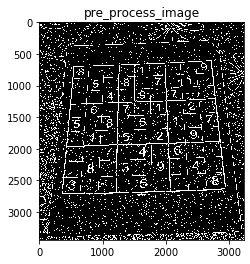

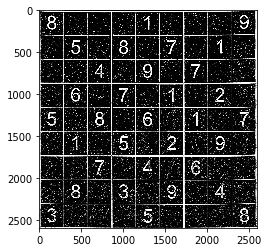

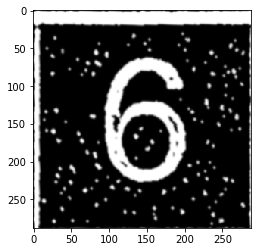

In [10]:
img=cv2.imread('paper.jpg')
        
warp=get_sudoku(img)
sudoku=cv2.GaussianBlur(warp, (9, 9), 1)

plt.imshow(sudoku,cmap='gray')
plt.show()

"""
kernel = np.ones((10,10),np.uint8)
# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
dilation = cv2.dilate(sudoku,kernel,iterations = 1)

plt.imshow(dilation,cmap='gray')
plt.show()
"""
sudoku = cv2.cvtColor(sudoku, cv2.COLOR_GRAY2BGR)

n = sudoku.shape[1]//9

crop_img = sudoku[(3*n):(3*n)+n,(1*n):(1*n)+n]

cv2.imwrite("6.jpg",crop_img)

#ppi = pre_process_image(sudoku)

#sudoku = ~sudoku

#ppi = pre_process_image(sudoku)

plt.imshow(crop_img,cmap='gray')
plt.show()

#get_number(crop_img)


In [7]:
def get_grids(sudoku):
    images=[]
    m = sudoku.shape[0]//9
    n = sudoku.shape[1]//9
    for i in range(0,9):
        for j in range(0,9):
            crop_img = sudoku[i*m:i*m+m,j*n:j*n+n]
            plt.imshow(crop_img,cmap = 'gray')
            plt.show()
            images.append(crop_img)
    return images

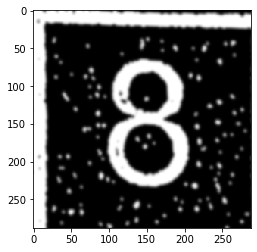

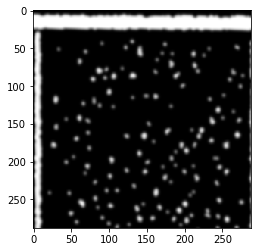

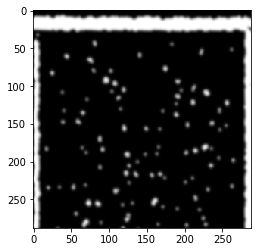

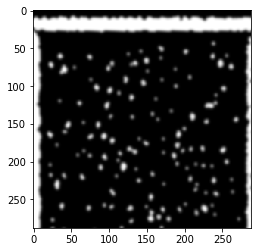

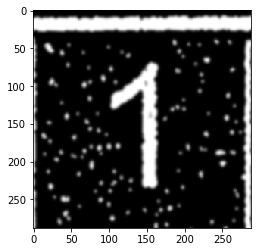

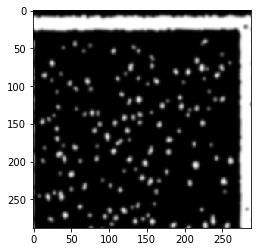

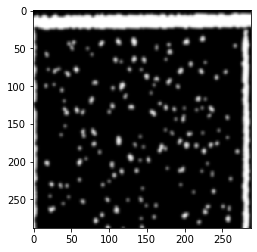

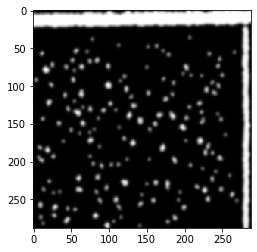

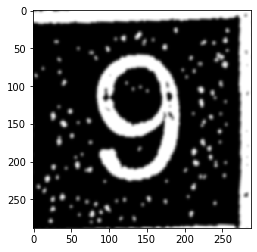

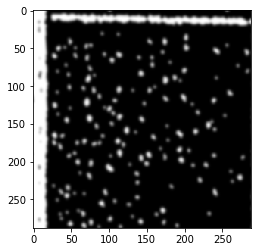

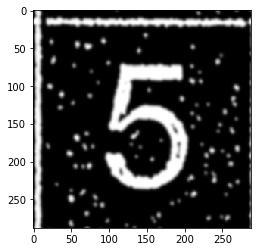

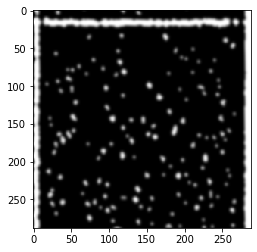

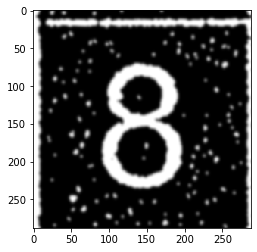

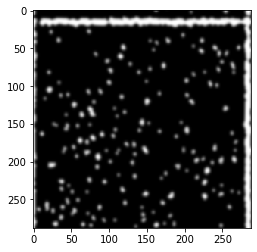

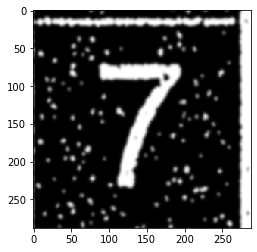

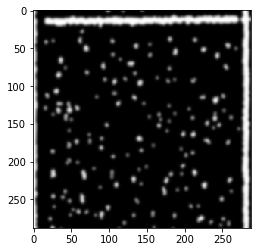

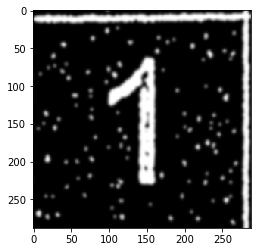

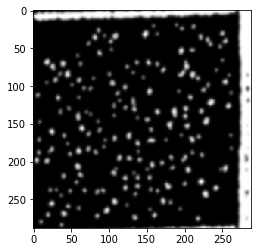

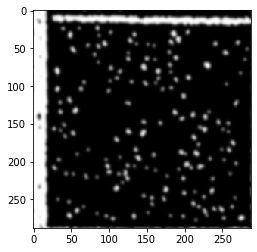

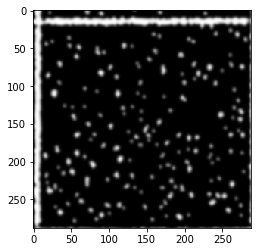

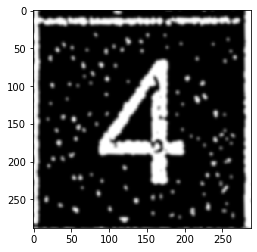

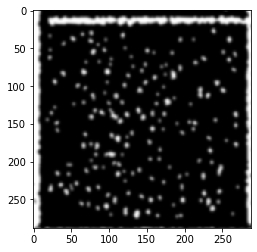

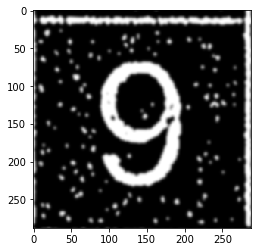

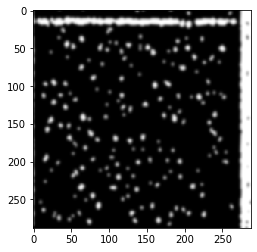

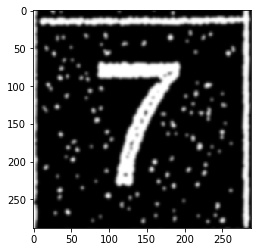

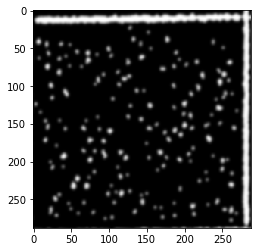

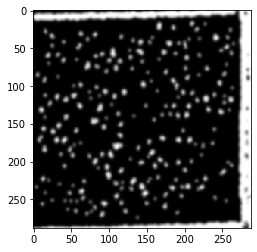

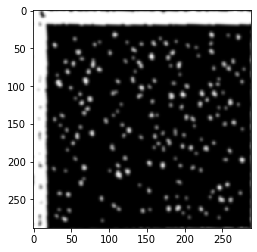

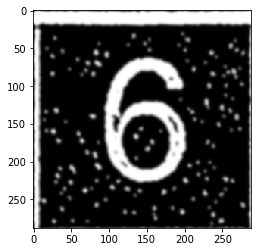

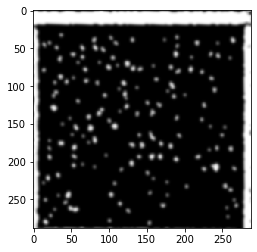

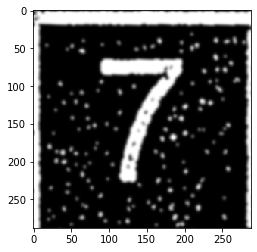

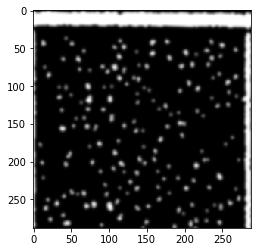

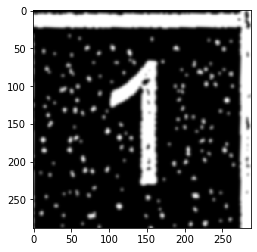

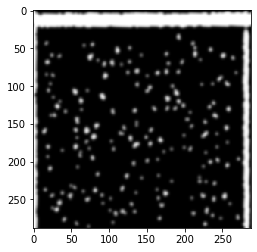

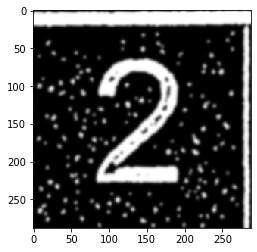

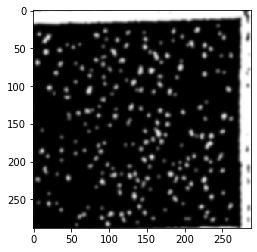

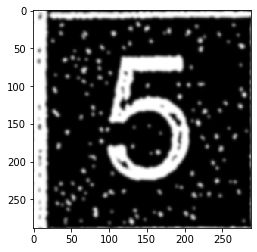

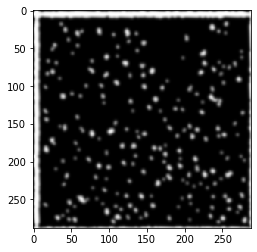

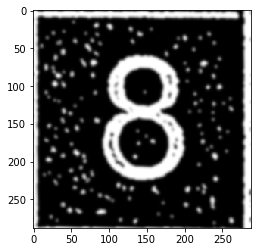

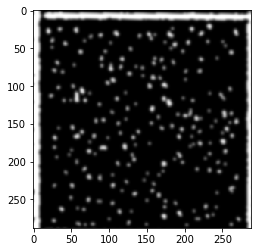

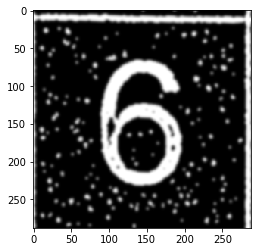

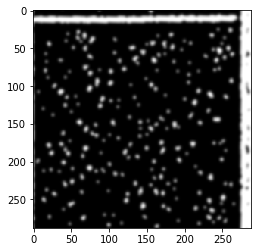

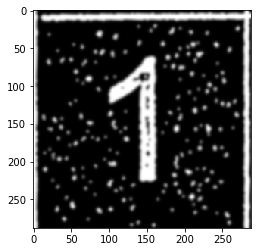

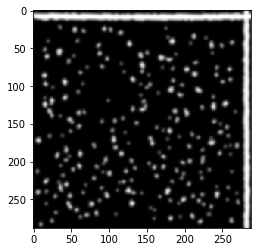

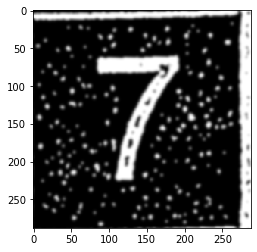

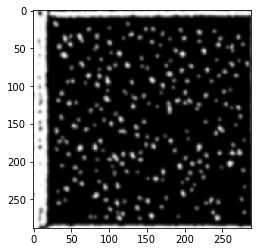

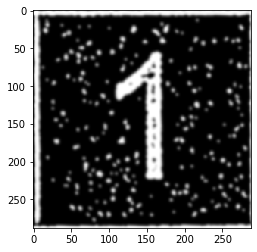

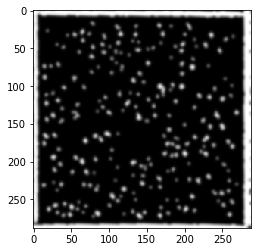

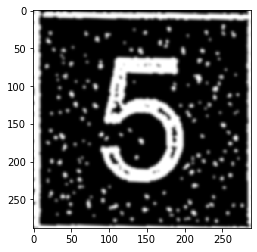

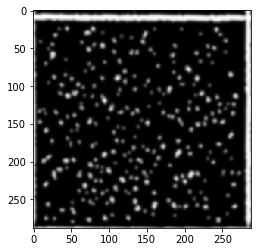

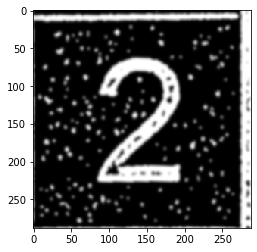

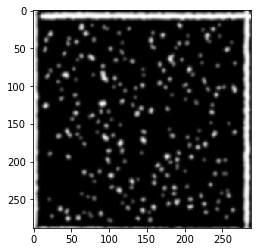

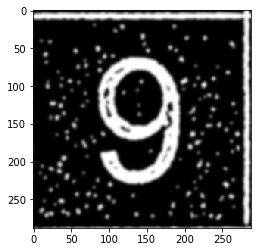

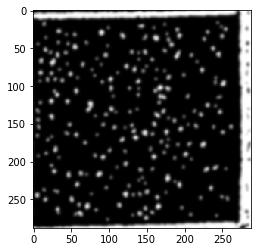

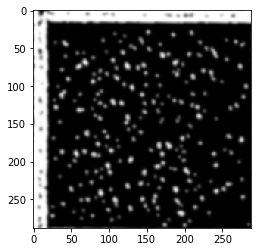

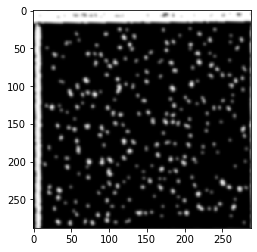

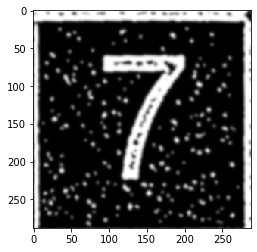

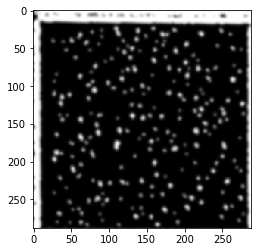

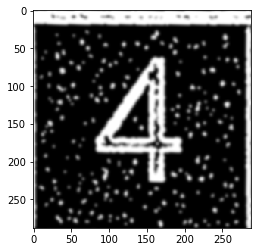

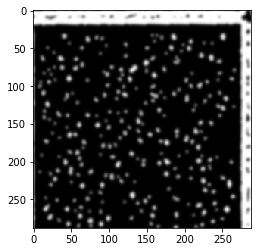

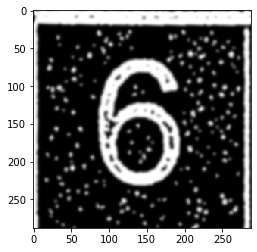

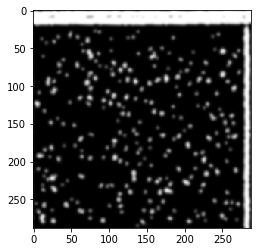

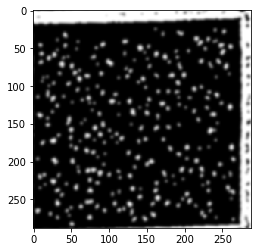

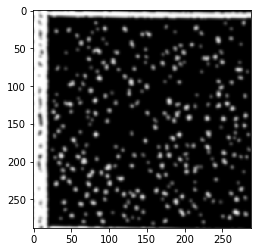

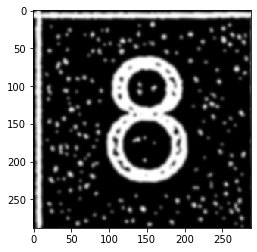

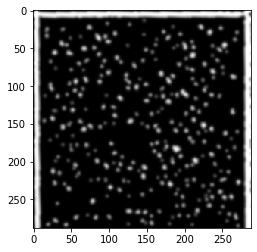

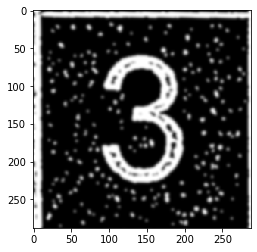

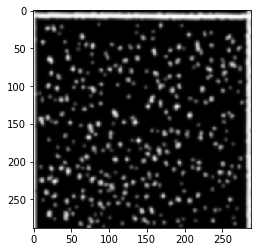

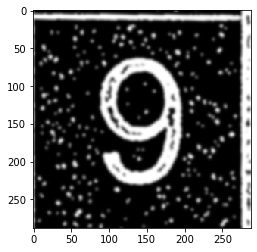

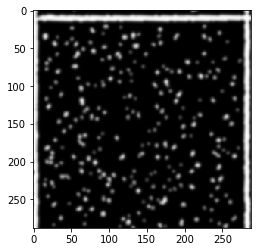

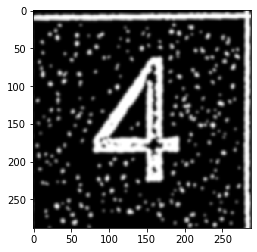

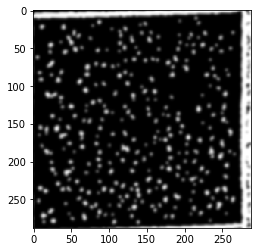

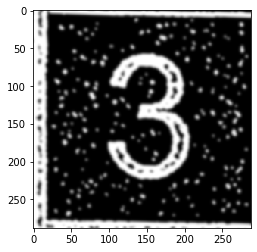

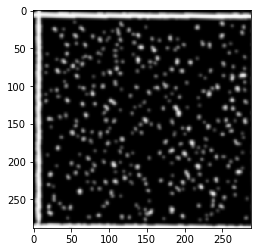

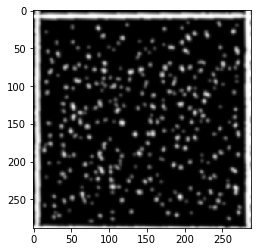

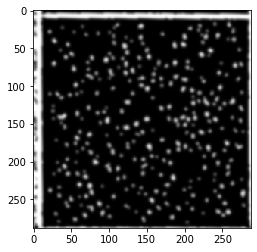

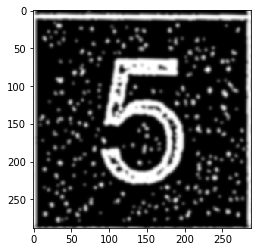

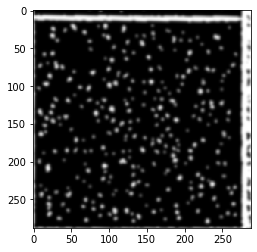

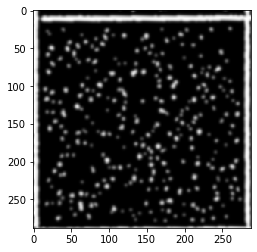

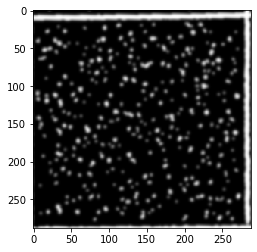

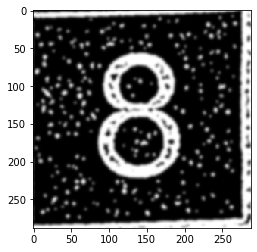

In [8]:
grids = get_grids(sudoku)

In [11]:
def matrix(grid):
    a=[]
    k=0
    for i in range(0,9):
        b = []
        for j in range(0,9):
            #crop = cv2.cvtColor(grid[k], cv2.COLOR_GRAY2BGR)
            num = get_number(grid[k])
            k=k+1
            b.append(num)
        a.append(b)
    return a   

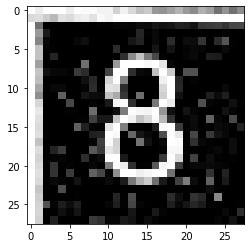

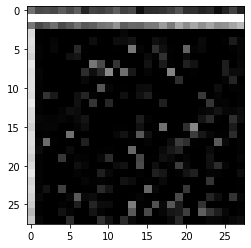

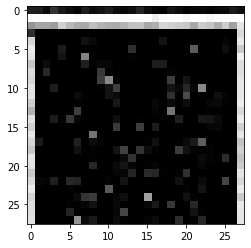

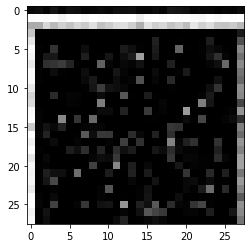

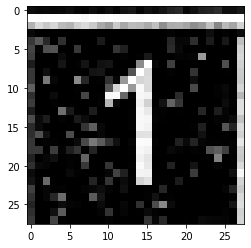

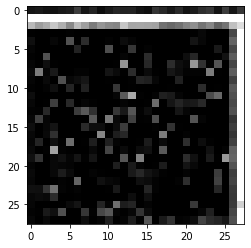

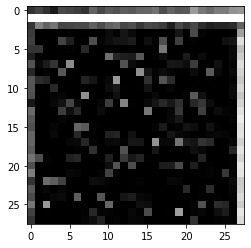

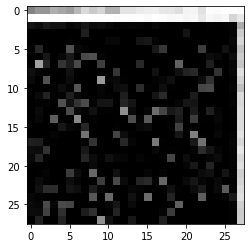

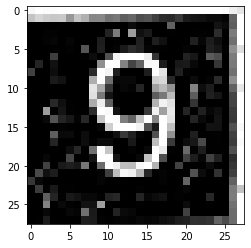

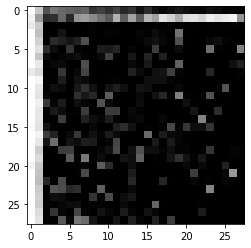

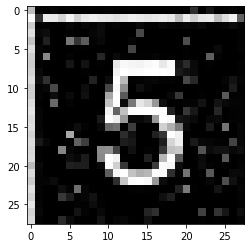

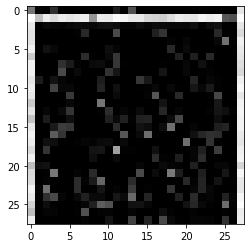

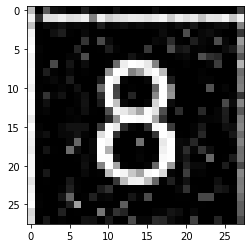

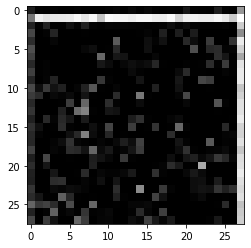

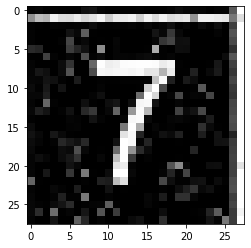

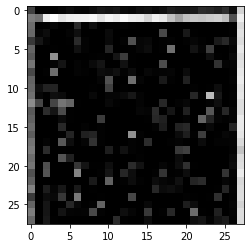

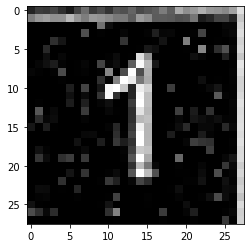

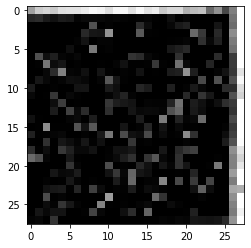

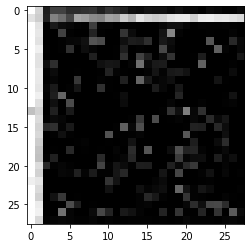

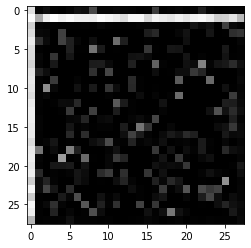

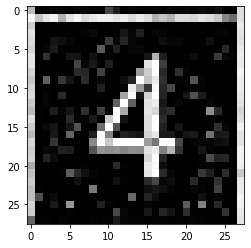

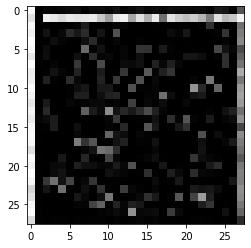

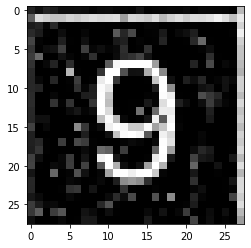

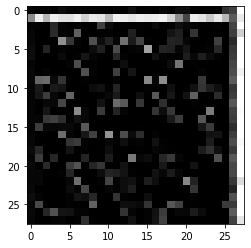

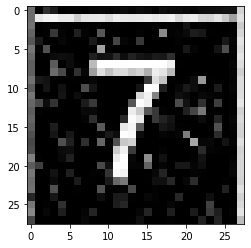

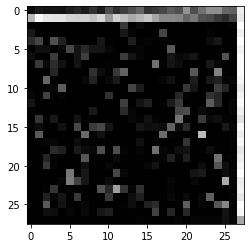

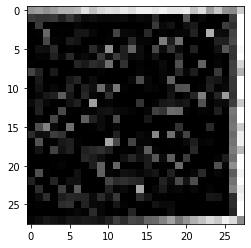

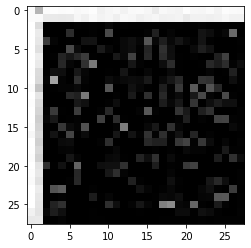

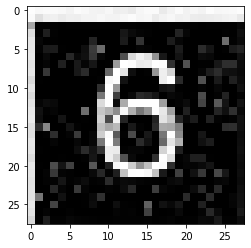

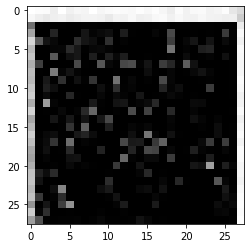

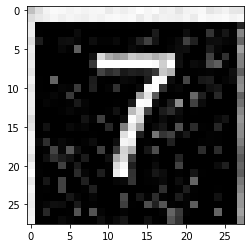

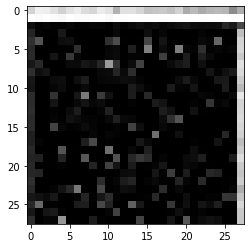

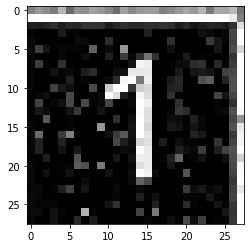

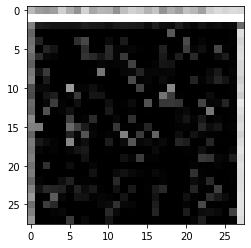

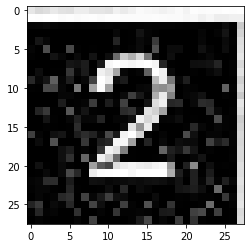

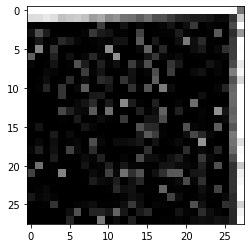

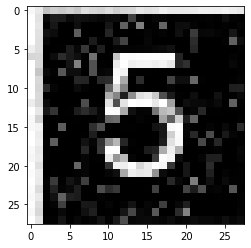

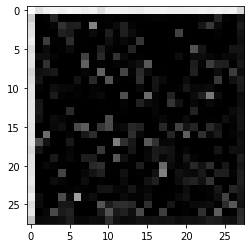

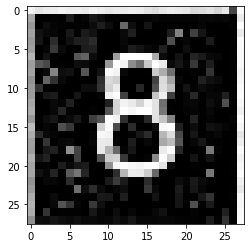

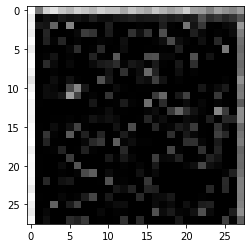

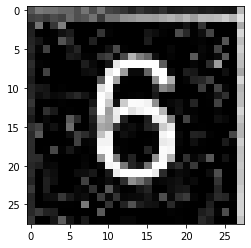

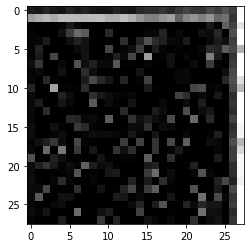

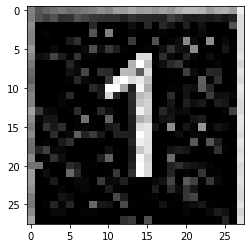

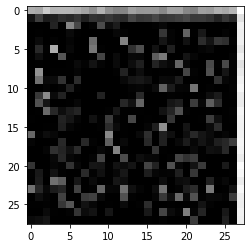

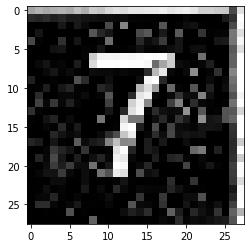

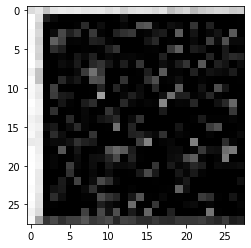

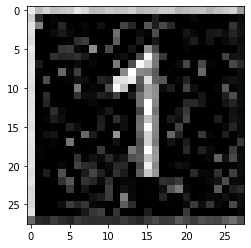

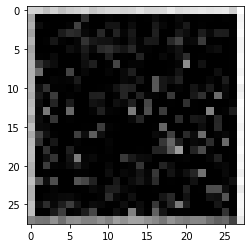

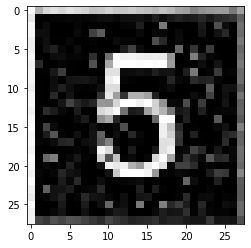

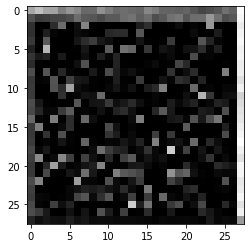

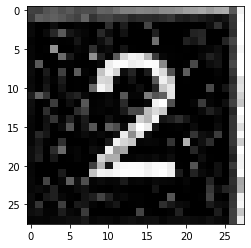

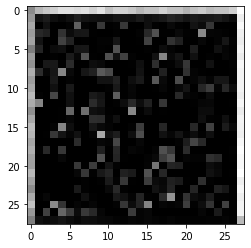

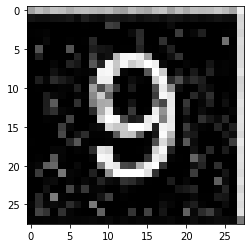

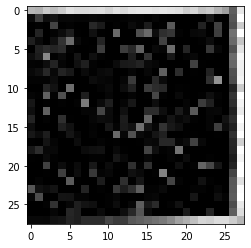

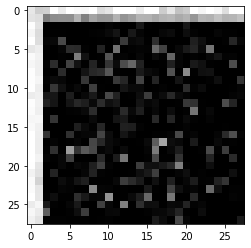

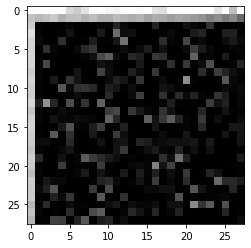

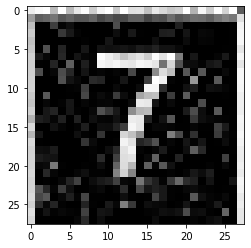

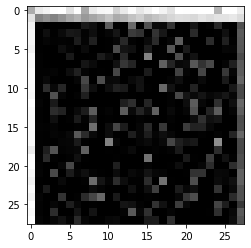

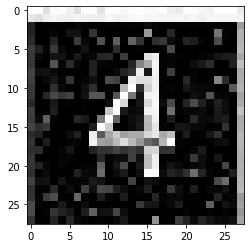

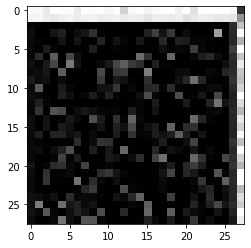

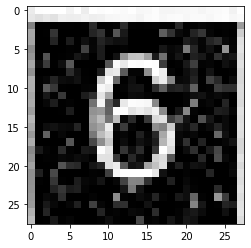

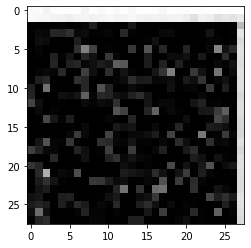

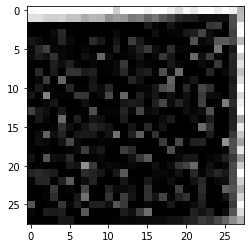

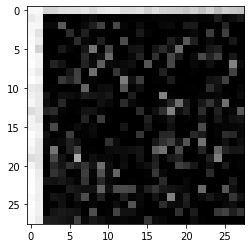

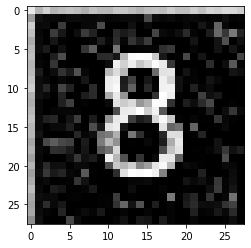

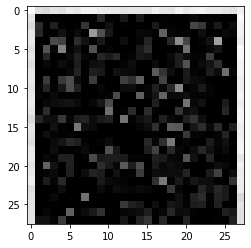

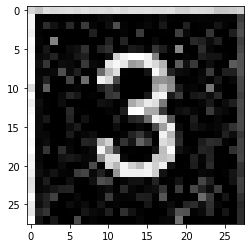

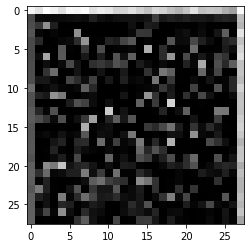

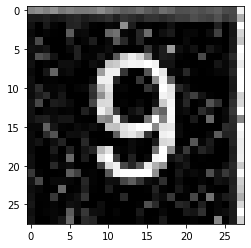

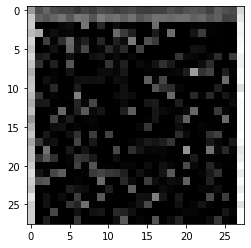

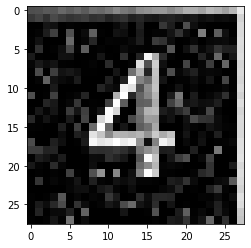

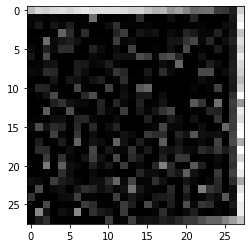

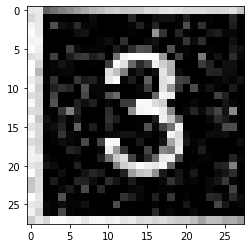

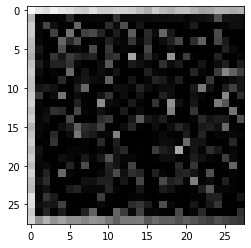

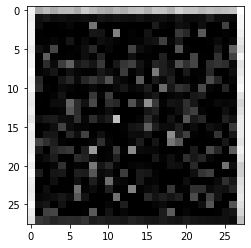

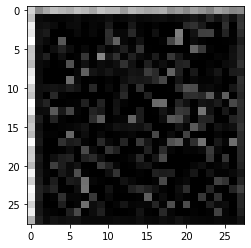

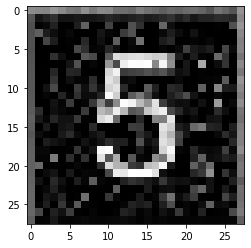

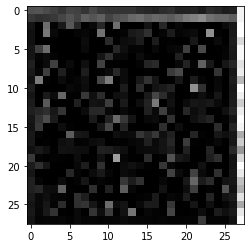

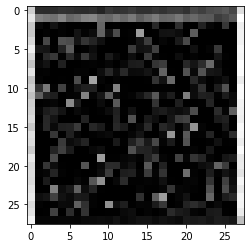

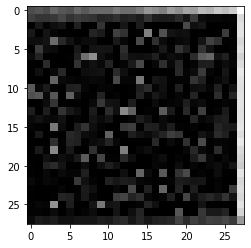

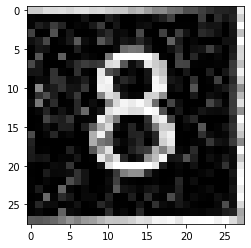

In [12]:
m = matrix(grids)

In [13]:
m

[[8, 3, 8, 8, 1, 8, 5, 8, 9],
 [8, 5, 8, 8, 4, 7, 2, 1, 8],
 [2, 8, 4, 5, 9, 8, 7, 8, 8],
 [8, 5, 2, 7, 3, 1, 3, 2, 3],
 [5, 8, 8, 3, 5, 5, 1, 8, 7],
 [8, 1, 3, 5, 8, 2, 8, 9, 8],
 [5, 8, 7, 5, 4, 8, 5, 5, 8],
 [5, 8, 5, 3, 8, 9, 5, 4, 5],
 [3, 8, 8, 8, 5, 8, 8, 8, 8]]

In [ ]:
img=cv2.imread('paper.jpg')
        
warp=get_sudoku(img)
sudoku=cv2.GaussianBlur(warp.copy(), (9, 9), 0)
    
    #cv2.imshow('Blur',sudoku)
    
m=sudoku.shape[0]
n=sudoku.shape[1]
crop_img = sudoku[0:0+n//9, 0:0+m//9]
plt.imshow(crop_img,cmap='gray')
    
   

In [ ]:
#cv2.imwrite('crop.jpg',crop_img)

In [ ]:
crop_img = cv2.cvtColor(crop_img, cv2.COLOR_GRAY2BGR)

In [ ]:
print(get_number(crop_img))

In [ ]:
#warp = cv2.GaussianBlur(warp.copy(), (9, 9), 0)

In [ ]:
#Capturing Webcam Feed
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    
    ret, img = cap.read()
    
    if not ret:
        break
        
    warp=get_sudoku(img)
    sudoku=cv2.GaussianBlur(warp.copy(), (9, 9), 0)
    
    #cv2.imshow('Blur',sudoku)
    
    m=sudoku.shape[0]
    n=sudoku.shape[1]
    
    
    temp=sudoku.resize(n//9,n//9);
    cv2.imshow('temp',temp)
            #model.predict()
    
    
    k = cv2.waitKey(10)
    if k == 27: #Esc Key
        break
        
cap.release()
cv2.destroyAllWindows()